### Import Dependencies

In [2]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

### Read in the csv file grouped by date with a count of crime type for each city

In [3]:
austin_total = pd.read_csv('Austin/austin_by_date_2016.csv')
austin_avg = pd.read_csv('Austin/austin_by_date_2016_avg.csv')
austin_holidays = pd.read_csv('Austin/austin_by_date_2016_holidays.csv')

la_total = pd.read_csv('Los_Angles_city/LA_by_date_2016.csv')
la_avg = pd.read_csv('Los_Angles_city/LA_by_date_2016_avg.csv')
la_holidays = pd.read_csv('Los_Angles_city/LA_by_date_2016_holidays.csv')

chicago_total = pd.read_csv('Chicago_City/chicago_date_group_2016.csv')
chicago_avg = pd.read_csv('Chicago_City/chicago_date_group_2016_avg.csv')
chicago_holidays = pd.read_csv(
    'Chicago_City/chicago_date_group_2016_holidays.csv')

cities_total = pd.read_csv('cities_by_date_2016.csv')
cities_avg = pd.read_csv('cities_by_date_2016_avg.csv')
cities_holidays = pd.read_csv('cities_by_date_2016_holidays.csv')

### Convert to dataframes

In [4]:
austin_total_df = pd.DataFrame(austin_total)
austin_avg_df = pd.DataFrame(austin_avg)
austin_holidays_df = pd.DataFrame(austin_holidays)

la_total_df = pd.DataFrame(la_total)
la_avg_df = pd.DataFrame(la_avg)
la_holidays_df = pd.DataFrame(la_holidays)

chicago_total_df = pd.DataFrame(chicago_total)
chicago_avg_df = pd.DataFrame(chicago_avg)
chicago_holidays_df = pd.DataFrame(chicago_holidays)

cities_total_df = pd.DataFrame(cities_total)
cities_avg_df = pd.DataFrame(cities_avg)
cities_holidays_df = pd.DataFrame(cities_holidays)

### Summary of Questions for analysis:
1.        Is there an increase in crime during major shopping holidays? 
2.        Which Crimes are most prevalent during major shopping holidays? 
3.        Are there specific cities more prone to an increase in crime during major shopping holidays?
4.        Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major shopping holidays? 
5.        *insert new question*. 

Great sample resource:

* UCFLM201809DATA2/05-Matplotlib/3/Activities/10-Stu_Fits_and_Regression/Solved/crime.ipynb 
* https://github.com/UCF-Coding-Boot-Camp/UCFLM201809DATA2/blob/master/05-Matplotlib/3/Activities/10-Stu_Fits_and_Regression/Solved/crime.ipynb

###  Is there an increase in crime during major shopping holidays? 

### Definition of shopping holidays:

In [5]:
holiday_df = pd.read_csv("retail_holidays.csv")

###  Is there an increase in crime during major shopping holidays? 

* ### Use cities_dfs to answer this question
* ### Charts should use: cities_df_avg (base)  vs cities_df_holidays

In [6]:
# chart 2

#save chart ('../Images/chart.png')

## Which major shopping holiday has the most occurrence of crime and Which Crimes are most prevalent during major shopping holidays?
### Use the data from 3 cities: Austin, Los Angeles and Chicago

* ### Use holiday_dfs to answer these question
* ### Charts should use: holiday_dfs
* #### Chart 1: Stack bar chart using total crime count and major shopping holiday. 
* #### Analysis 1: we can determine which major shopping holiday has the most occurrence of crime.
* #### Chart 2: Stack bar chart1: holiday crime with crime type on x-axis vs crime count for individual crime type.
* #### Analysis 2:  we can determine Which Crimes are most prevalent during major shopping holidays?

In [7]:
# Dataframes to use:
# holidays_dfs

# Make sure all the dataframes are with same data types.
austin_holidays_df["AGGRAVATED ASSAULT"] = austin_holidays_df["AGGRAVATED ASSAULT"].astype(
    'float')
la_holidays_df["DRUG OFFENSE"] = la_holidays_df["DRUG OFFENSE"].astype('float')
chicago_holidays_df["RAPE"] = chicago_holidays_df["RAPE"].astype('float')



In [8]:
# Delete the last 2 rows of the dataframes.
austin_crime = austin_holidays_df[:-2]
la_crime = la_holidays_df[:-2]
chicago_crime = chicago_holidays_df[:-2]

In [9]:
# Rearrange the dataframe for the plot
austin_holidays_crime_df = austin_crime[['Date', 'Holiday', 'BURGLARY', 'THEFT',
                                         'AGGRAVATED ASSAULT', ' RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]
la_holidays_crime_df = la_crime[['Date', 'Holiday', 'BURGLARY', 'THEFT', 'AGGRAVATED ASSAULT',
                                 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]
chicago_holidays_crime_df = chicago_crime[['Date', 'Holiday ', 'BURGLARY', 'THEFT',
                                           'AGGRIVATED ASSAULT', 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'DRUG OFFENSE', 'FRAUD']]

### Function Name: bar_all_city
* Description: Plot the stack bar chart for 3 cities
* Arguments: 3 types of arguments for the y axis, x axis and the label for x axis


In [10]:
def bar_all_city(Total_crime1, Total_crime2, Total_crime3, x_axis, x_ticks):
    fig = plt.figure(figsize=(18, 8))

    city_name = ['Austin', 'Los Angles', 'Chicago']
    width = .60
    # Draw the bar plot for the 3 cities. Assign the color of the plot to one of the flag colors of that city
    plt.bar(x_axis, Total_crime1, color='red',
            width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_crime2, color='green',
            bottom=Total_crime1, width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_crime3, color='skyblue',
            bottom=Total_crime2, width=width, edgecolor='black', align='center')

    # Create the ticks for our bar chart's x axis
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x_ticks, rotation=65,
               fontsize=10, horizontalalignment="right")
    plt.legend(city_name, loc='upper right',
               edgecolor='black', title='City Names')

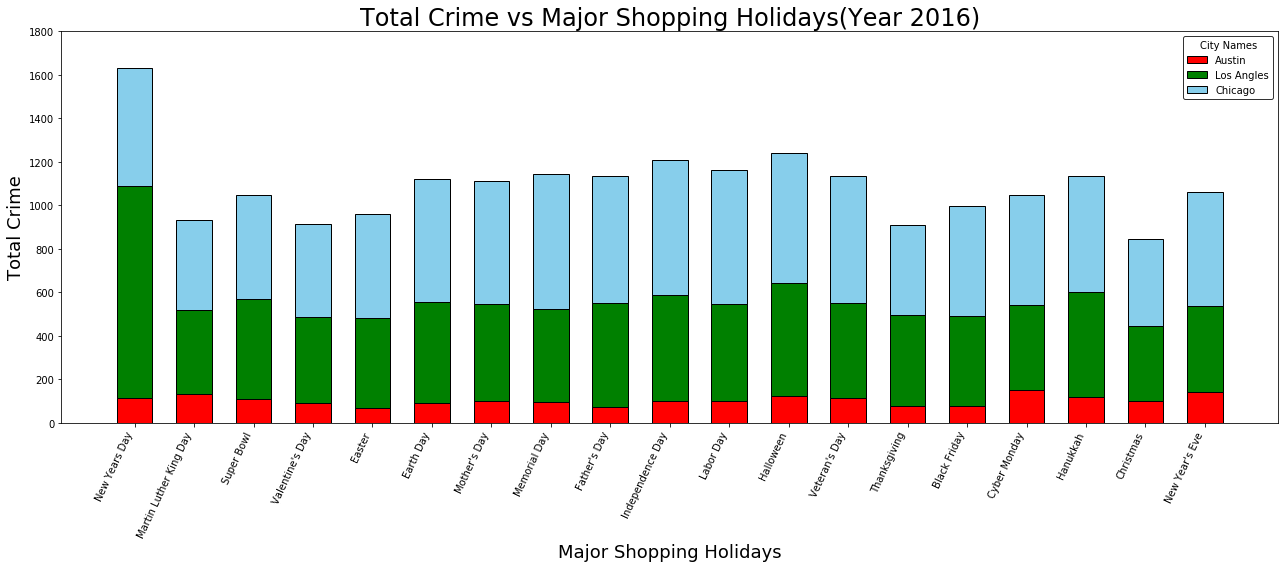

In [11]:
# Read the total crimes for each city
tot_crime1 = austin_crime['Total Crime Count']
tot_crime2 = la_crime['Total Crime Count']
tot_crime3 = chicago_crime['Total Crime Count']
# Assign x-axis
holiday_list = austin_crime["Holiday"]
x_range = range(len(holiday_list))
# Call the function
bar_all_city(tot_crime1, tot_crime2, tot_crime3, x_range, holiday_list)
# Set Y limits of the plot
plt.ylim([0, 1800])
# Set all the labels and title of the plot
plt.ylabel('Total Crime', fontsize=18)
plt.xlabel('Major Shopping Holidays', fontsize=18)
plt.title('Total Crime vs Major Shopping Holidays(Year 2016)', fontsize=24)
plt.tight_layout()
# Save and display the chart
plt.savefig("Images/Total_crime_holidays.png")
plt.show()

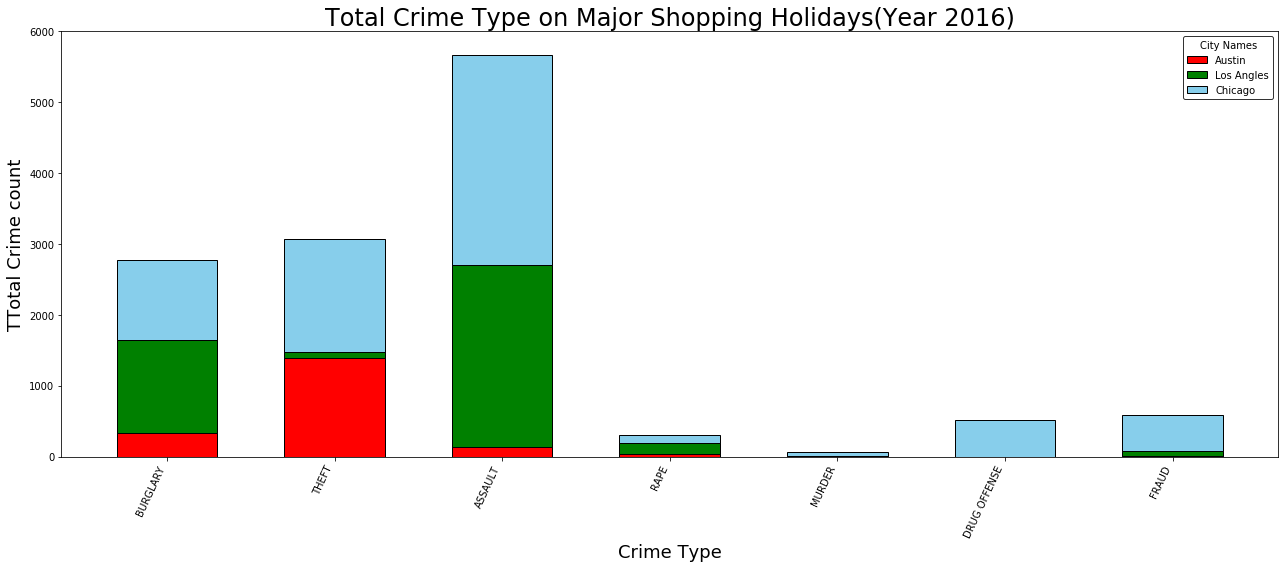

In [19]:
# Read the total crime types and the count for each city
tot_crime_type1 = austin_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
tot_crime_type2 = la_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
tot_crime_type3 = chicago_holidays_df.iloc[19, [2, 3, 4, 5, 6, 8, 9]]
# Assign x-axis
crime_list = ['BURGLARY', 'THEFT', 'ASSAULT',
              'RAPE', 'MURDER', 'DRUG OFFENSE', 'FRAUD']
x_range = range(len(crime_list))
# Call the function
bar_all_city(tot_crime_type1, tot_crime_type2,
             tot_crime_type3, x_range, crime_list)
# Set Y limits of the plot
plt.ylim([0, 6000])
# Set all the labels and title of the plot
plt.ylabel('TTotal Crime count', fontsize=18)
plt.xlabel('Crime Type', fontsize=18)
plt.title('Total Crime Type on Major Shopping Holidays(Year 2016)', fontsize=24)
plt.tight_layout()
# Save and display the chart
plt.savefig("Images/Total_crime_type_holidays.png")
plt.show()

## Description of two observable trends based on the data
### * Observation 1:


### Are there specific cities more prone to an increase in crime during major holidays?

* #### Analysis: Focus on aggregated crime data for each city. Do not need specifics of each crime type right now
* #### Avg crime in chicago (base) vs Total crime on holiday in chicago. Calc holiday crime total - base (repeat for each city). Which city experiences greatest increase/decrease in crime ?

* #### Also consider: Avg crime in chicago (base) vs Avg crime on holiday in chicago. Calc holiday crime avg - base (repeat for each city). Which city experiences greatest increase/decrease in crime ?

In [12]:
# Dataframes to use:
#austin_holidays_df
#austin_avg_df
#la_holidays_df
#la_avg_df
#chicago_holidays_df
#chicago_avg_df


# chart 1

#save chart ('../Images/chart.png')

In [13]:
# chart 2

#save chart ('../Images/chart.png')

### Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major holidays?

* #### This question is a bit subjective b/c it does not acct for population size. Use the method below to answer question:
* #### Find crime per captia: simply divide the total crime by the total population of the city
* #### Next, find the city with the lowest per captia crime
* #### Finally, for the city with the lowest per captia crime, use data frm question 3 and display the increase/decrease in crime during major holidays vs base (avg annual crime)

In [14]:
# population #s frm United States Census Bureau: 

austin_pop = 938200
la_pop = 3981000
chicago_pop = 2720000 

# chart 1

#save chart ('../Images/chart.png')

In [15]:
# chart 2

#save chart ('../Images/chart.png')

### Bonus Question. This question should be answered LAST after questions 1-4 have been answered with corresponding charts/conclusions. Use google Maps API.
* #### Choose one city: Chicago or LA:
* #### Map crime location base vs crime location during holiday. Use base location plotting as one symbol, holiday location plotting using a different symbol
* #### Include on map, major(predefined) retail location. Use one symbol to represent these retail locations. Plot location of holiday crimes using a different symbol. Does there appear to be any concenstration of crimes near these retail locations.

#### Predefined Retail locations:
* #### Wal-mart
* #### Bestbuy
* #### Radio Shack
* #### One other major retail store

In [16]:
# chart 1

#save chart ('../Images/chart.png')

In [17]:
# chart 2

#save chart ('../Images/chart.png')

### Conclusion
* Based on the data in this study, crime does/does not seem to increase during major shopping holidays
* Based on the data in this study, crime1,crime2, crime3, seem to be more prevelant during major shopping holidays
* Based on the data in this study, cityn, citym, cityk, seem to be more prone to an increase in crime during major shopping holidays
* Based on the data in the study, cities with the least amount of crime do/do not seem to experience an increase in crime that's more noticeable during major shopping holidays

### A step further
* limitations of the study: time constraints, lack of crime expertise, reliability of data
* biases of the study
* improvements: how study can be improved
* Major takeways